# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the neut cells

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig2d_neut_dr_20210112.h5ad")

In [5]:
adata.shape

(12410, 33712)

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC               92
LMPP              34
MPP myeloid       92
CMP              425
GMP             1281
promyelocyte    2191
myelocyte       3794
neutrophil      4501
dtype: int64

# Get monocle3 metadata and save into DC cell obj

In [7]:
metadata = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/neut_monocle3_pst_metadata_20210112.csv")
metadata.index=metadata["Unnamed: 0"]
metadata[:5]

,Unnamed: 0,cell_color
Unnamed: 0,,
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AACTGGTGTAAGTGTA,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_AAC...,89624.305116
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACGGCCAAGGATTCGG,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACG...,10240.132443
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACGGCCATCAGTTTGG,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACG...,115704.817879
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACGTCAAGTTAGGGTG,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ACG...,115253.974985
F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ATGAGGGCAGCTCGAC,F21_boneMarrow_CD45+_FCAImmP7179367_3prime_ATG...,115621.604996


In [8]:
metadata.columns

Index(['Unnamed: 0', 'cell_color'], dtype='object')

In [9]:
adata.obs["monocle3_pst_val"] = metadata["cell_color"]
adata.obs["monocle3_pst_val"] = adata.obs["monocle3_pst_val"].replace(np.inf, np.nan)

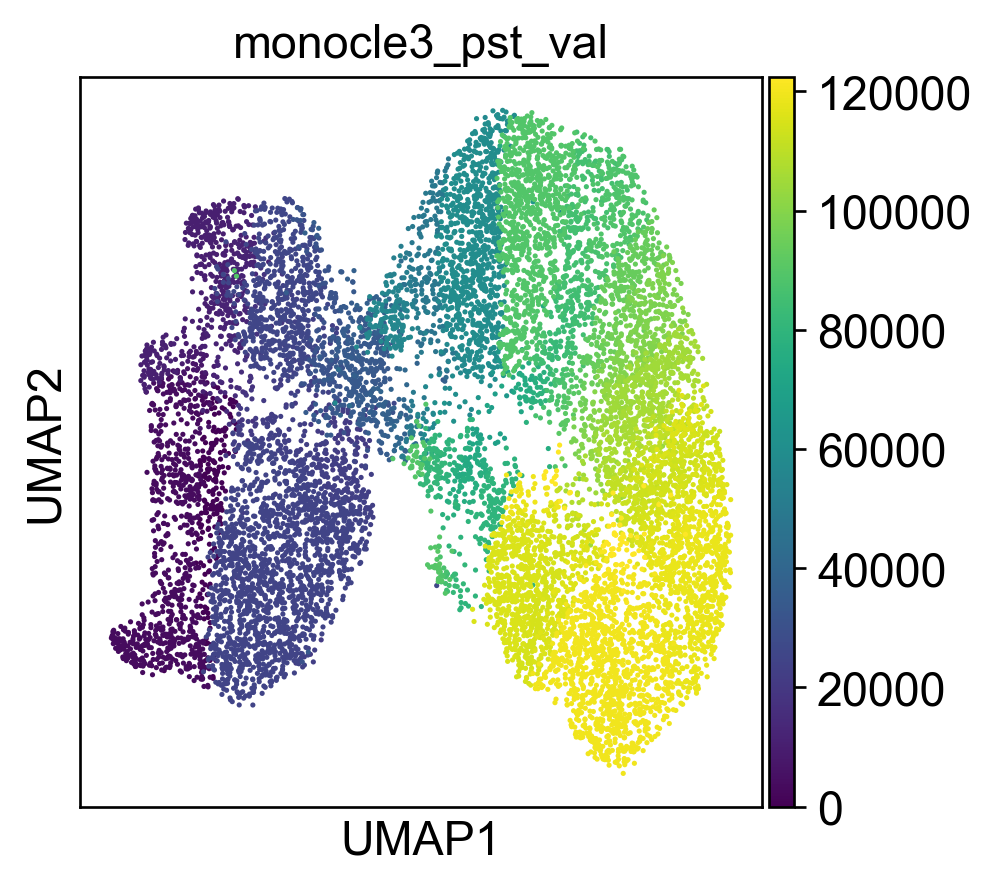

In [10]:
sc.pl.umap(adata, color="monocle3_pst_val")

In [11]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig2d_neut_dr_20210112.h5ad")

# Run plots for genes over pseudotime

In [12]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [13]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [15]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig2d_neut_dr_20210112.h5ad")

# Plot heatmap

In [16]:
genes = ['SBDS',
'HAX1',
'G6PC3',
'ELANE',
'SLC37A4',
'GFI1',
'JAGN1',
'AP3B1',
'VPS45',
'LAMTOR2',
'HUWE1',
'CHD2',
'TCIRG1',
'WDR1',
'KAT6A',
'CXCR4',
'WAS',
'TAZ',
'VPS13B']

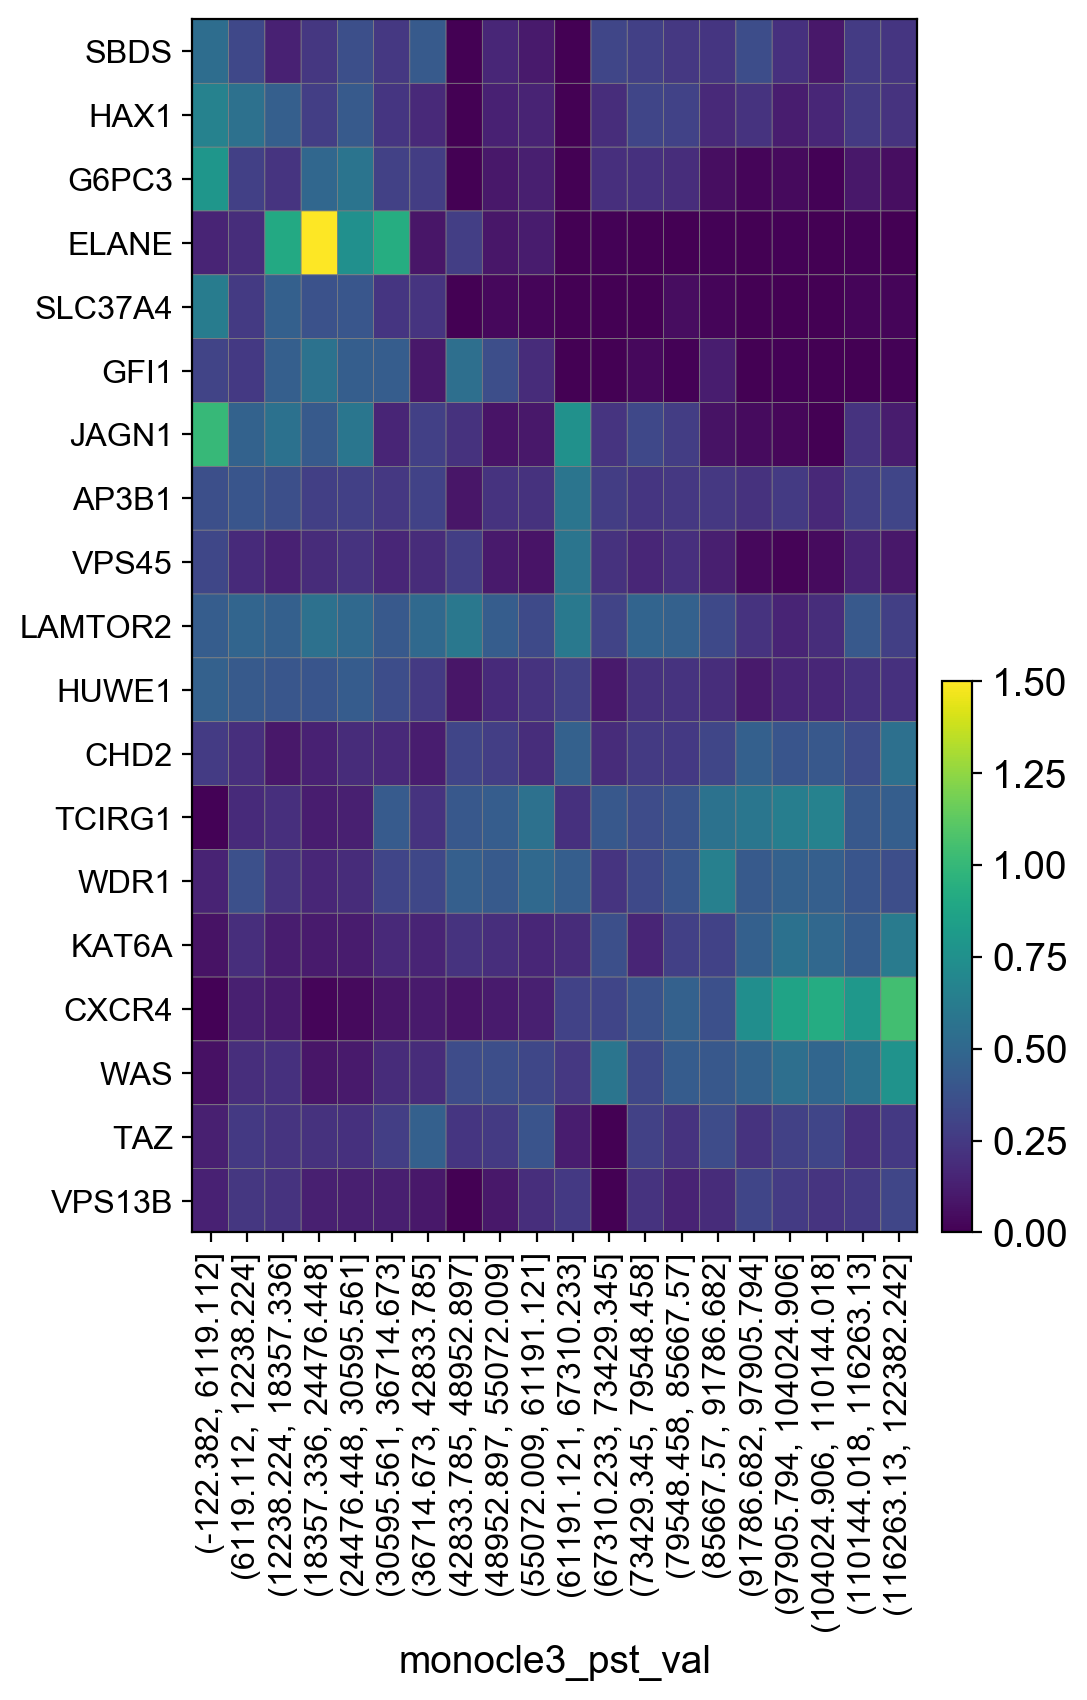

In [17]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
gs = sc.pl.matrixplot(adata, var_names=genes, save="fig2d_neut_pst_genes_20210112.pdf", num_categories=20, 
                      groupby='monocle3_pst_val', swap_axes=True, use_raw=False, figsize=[5,8], vmax=1.5)

# Run density plot for celltypes

HSC
#d200d2
LMPP
#EF4352
MPP myeloid
#0000ff
CMP
#a56900
GMP
#f79d00
promyelocyte
#ff254e
myelocyte
#ff7790
neutrophil
#ffc7d2


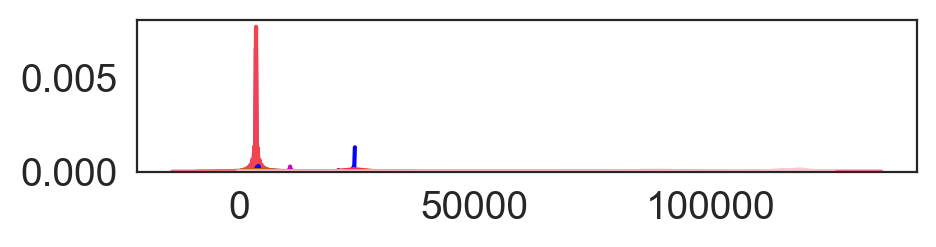

In [18]:
df = pd.DataFrame(adata.obs)
mpl.rcParams['figure.figsize'] = 5, 1

celltype_list=['HSC', 'LMPP', 'MPP myeloid', 'CMP', 'GMP', 'promyelocyte', 'myelocyte', 'neutrophil']
colour_list = ['#d200d2', '#EF4352', '#0000ff', '#a56900', '#f79d00', '#ff254e', '#ff7790', '#ffc7d2']
j=-1
sns.set_style("white")

for i in celltype_list:
    print(i)
    j=j+1
    print(colour_list[j])
    subset_df=df[df["cell.labels"]==i]
    ax=sns.kdeplot(subset_df["monocle3_pst_val"], color=colour_list[j], legend=False)

plt.show()
fig = ax.get_figure()
fig.savefig('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/useful_scripts/fig2_myeloid/figures/neut_pst_celltypes_20210112.pdf')